In [8]:
%load_ext autoreload
%autoreload 2
from machine_learning.reinforcement_learning import actors, algorithms, policy
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
track = actors.Track(filename='R-track.txt', harsh_crash_variant=False)
track.start_track()

pi = policy.Policy(actions=track.get_actions(), states=track.get_states())

ql = algorithms.QLearning(pi, 10, track, .9)

ql.load_from_file("../../R-track.txt_<class 'machine_learning.reinforcement_learning.algorithms.QLearning'>_False")

In [68]:
for t_file in [f'{c}-Track.txt' for c in ["R", "L", "O"]]:
    for variant in [True, False]:
        for algorithm in ["SARSA", "QLearning", "ValueIteration"]:
            print(t_file, variant, algorithm)
            track = actors.Track(filename=t_file, harsh_crash_variant=variant)
            track.start_track()
            pi = policy.Policy(actions=track.get_actions(), states=track.get_states())
            ql = algorithms.QLearning(pi, 10, track, .9)
            f = f"../../{t_file}_<class 'machine_learning.reinforcement_learning.algorithms.{algorithm}'>_{variant}"
            ql.load_from_file(f)
            ql.max_exploit = 1000

            print(np.mean([ql.exploit(i)[1] for i in range(len(ql.actor.starting_points)) for _ in range(10)]))

R-Track.txt True SARSA
1000.0
R-Track.txt True QLearning
1000.0
R-Track.txt True ValueIteration
1000.0
R-Track.txt False SARSA
953.26
R-Track.txt False QLearning
893.68
R-Track.txt False ValueIteration
1000.0
L-Track.txt True SARSA
728.375
L-Track.txt True QLearning
629.45
L-Track.txt True ValueIteration
1000.0
L-Track.txt False SARSA
65.8
L-Track.txt False QLearning
94.575
L-Track.txt False ValueIteration
72.025
O-Track.txt True SARSA
980.95
O-Track.txt True QLearning
944.275
O-Track.txt True ValueIteration
498.45
O-Track.txt False SARSA
61.75
O-Track.txt False QLearning
64.375
O-Track.txt False ValueIteration
31.725


In [240]:
path, n_steps = ql.exploit()

n_steps

1000

1000

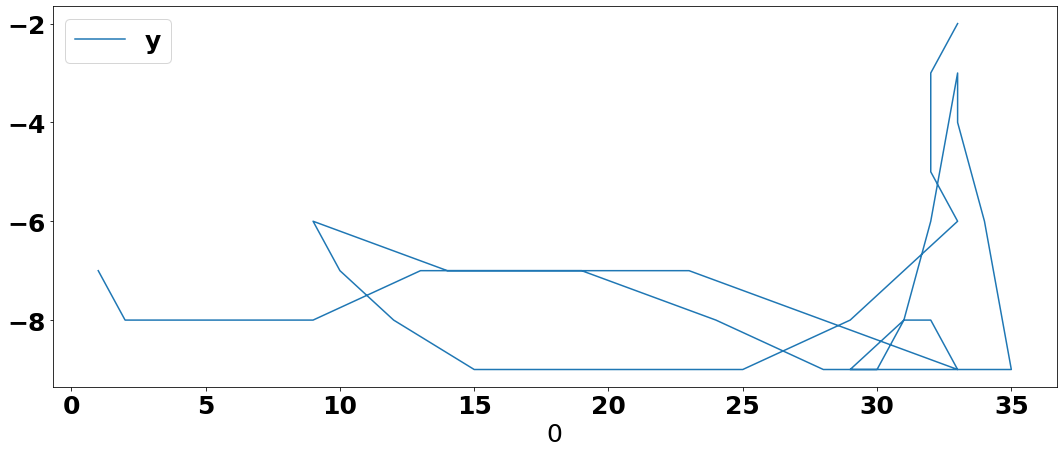

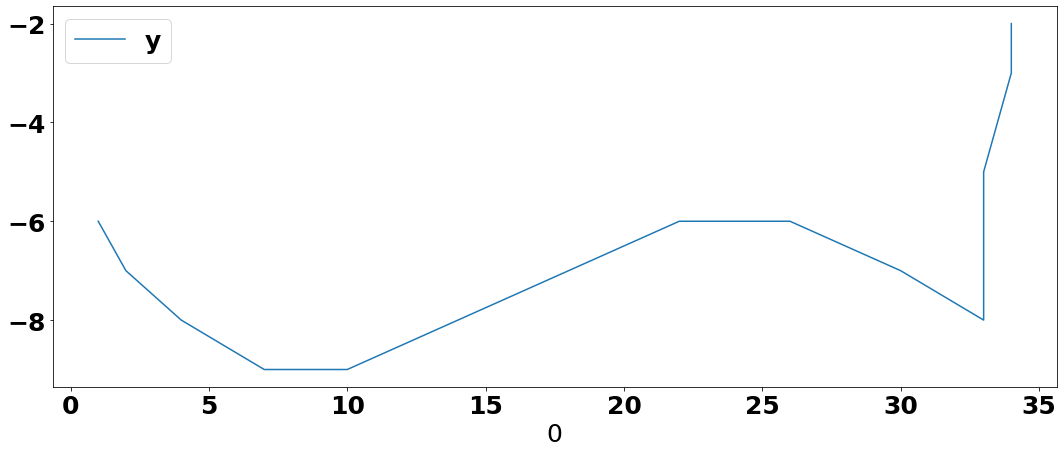

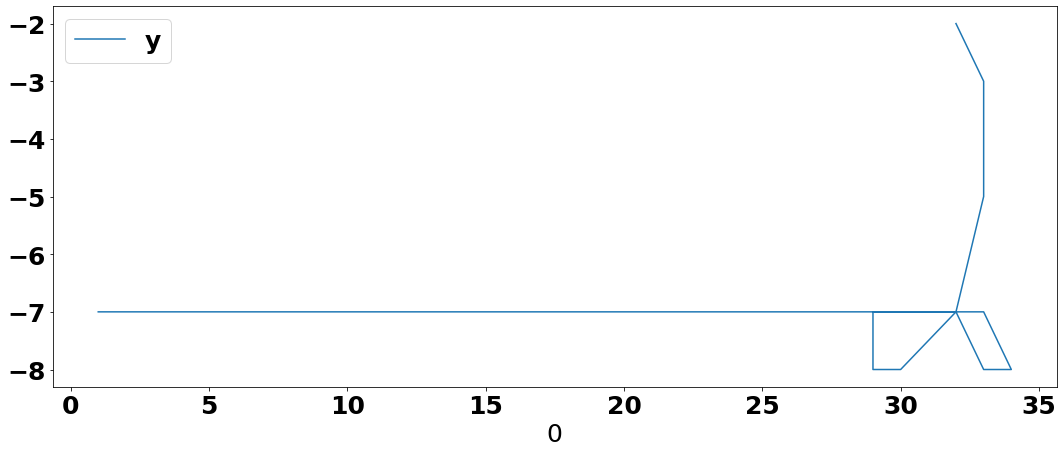

In [67]:
from plotly import express as px


for algo in [algorithms.QLearning, algorithms.SARSA, algorithms.ValueIteration]:
    track = actors.Track(filename='L-track.txt', harsh_crash_variant=False)
    track.start_track()

    pi = policy.Policy(actions=track.get_actions(), states=track.get_states())

    ql = algo(pi, 10, track, .9)

    ql.load_from_file(f"../../L-track.txt_{algo}_False")

    path, steps = ql.exploit()
    
    
    (
        pd.DataFrame(path)
        .iloc(axis=1)
        [0:2]
        .assign(y=lambda df: df[1] * -1)
        .plot(x=0, y='y', figsize=(18, 7))
    )
    
    plt.show()
    
    

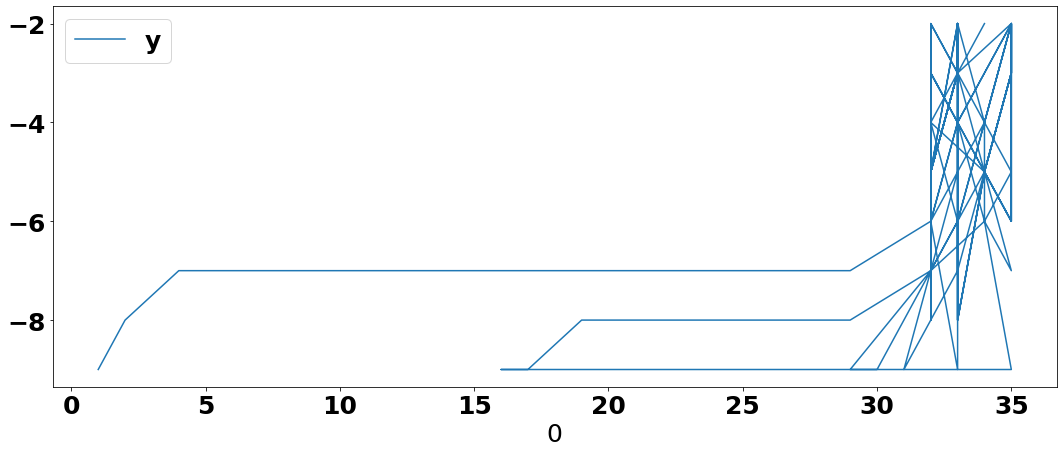

In [63]:
(
    pd.DataFrame(path)
    .iloc(axis=1)
    [0:2]
    .assign(y=lambda df: df[1] * -1)
    .plot(x=0, y='y', figsize=(18, 7))
)

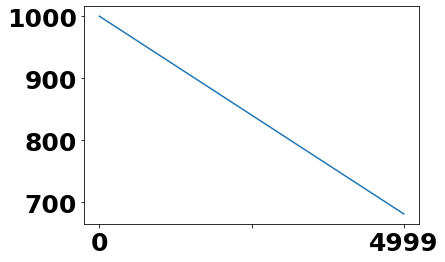

In [45]:
res = load_results("../../R*Q*False")


pd.DataFrame([1000] * 50).merge(pd.DataFrame((list(res.values())[0])), left_index=True, right_index=True).mean().plot()

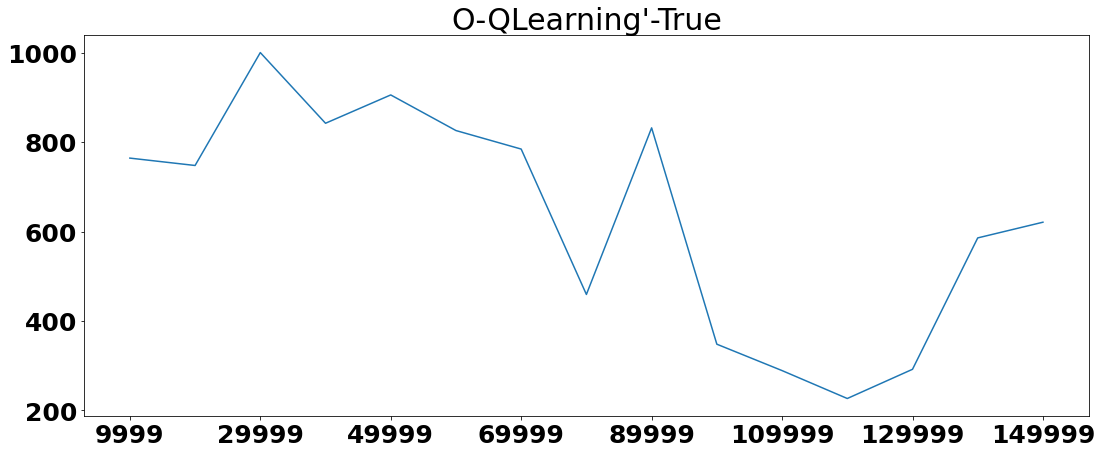

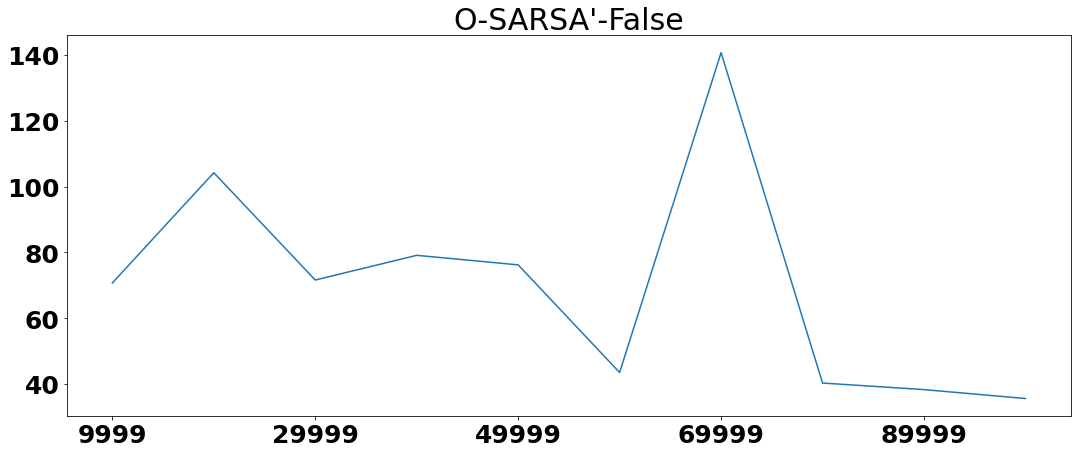

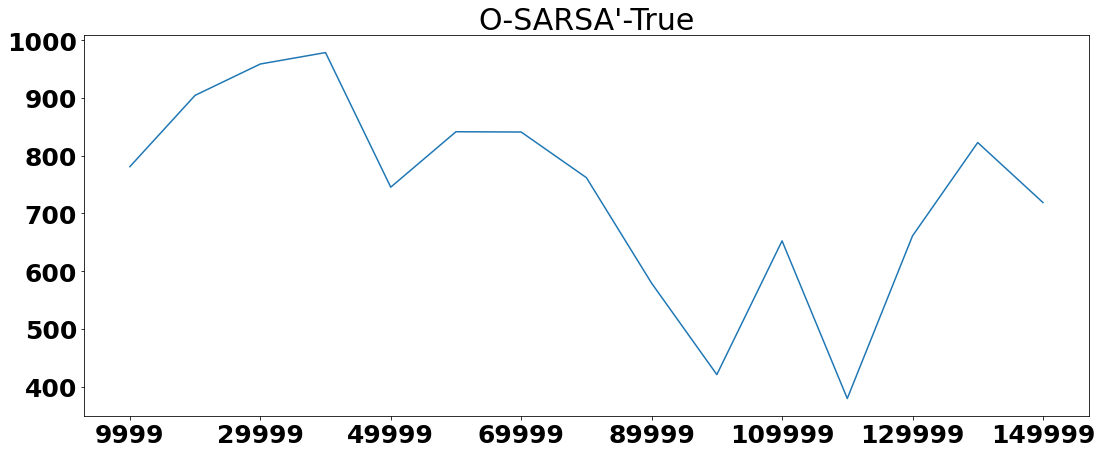

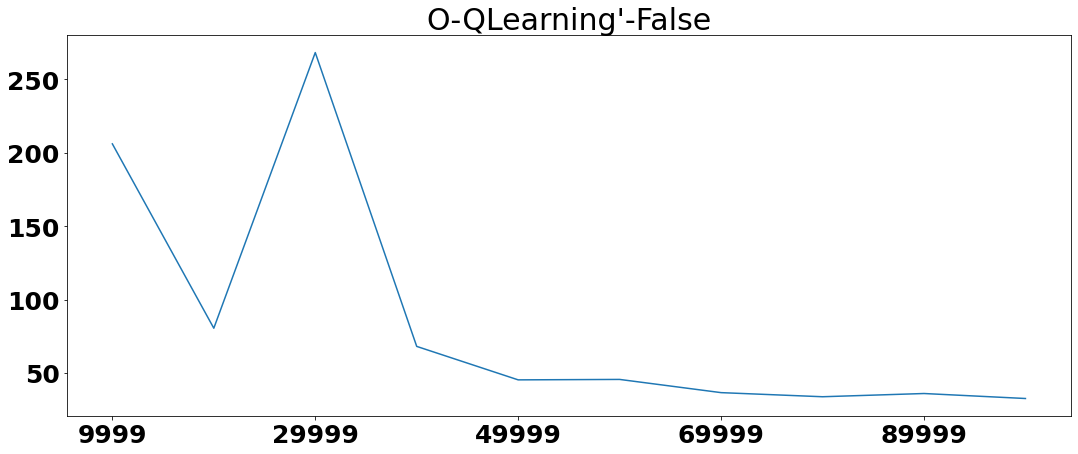

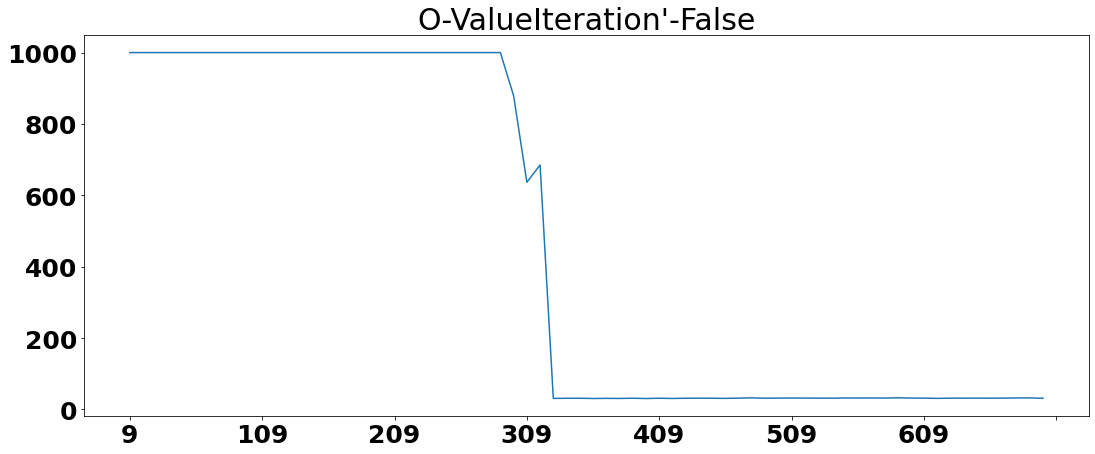

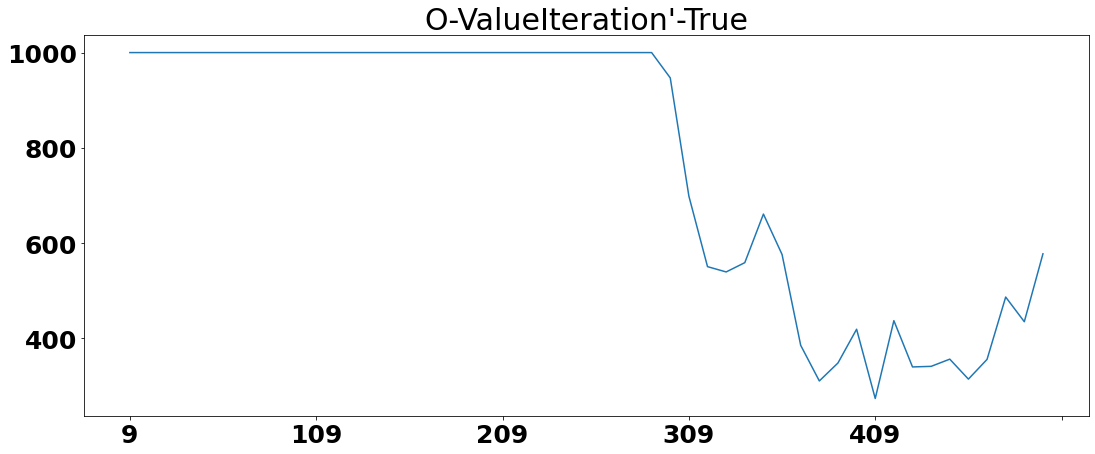

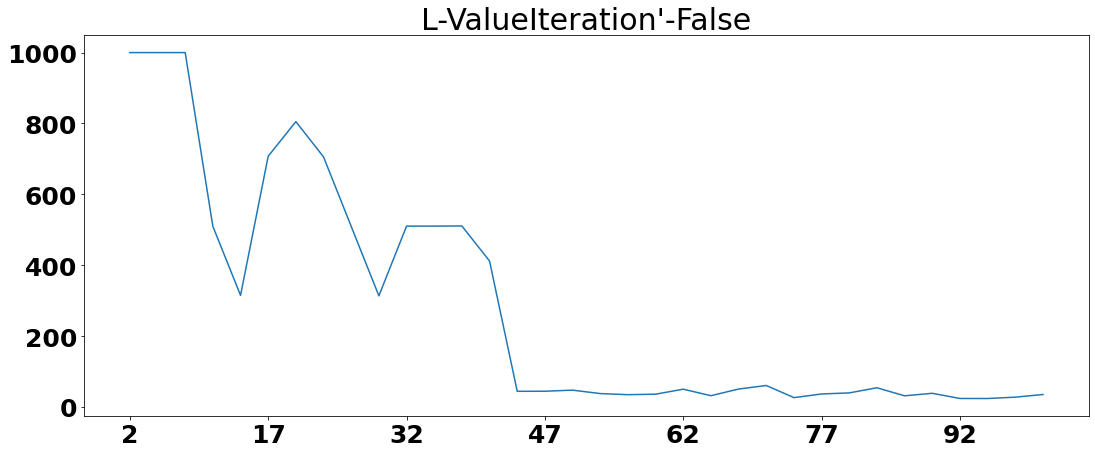

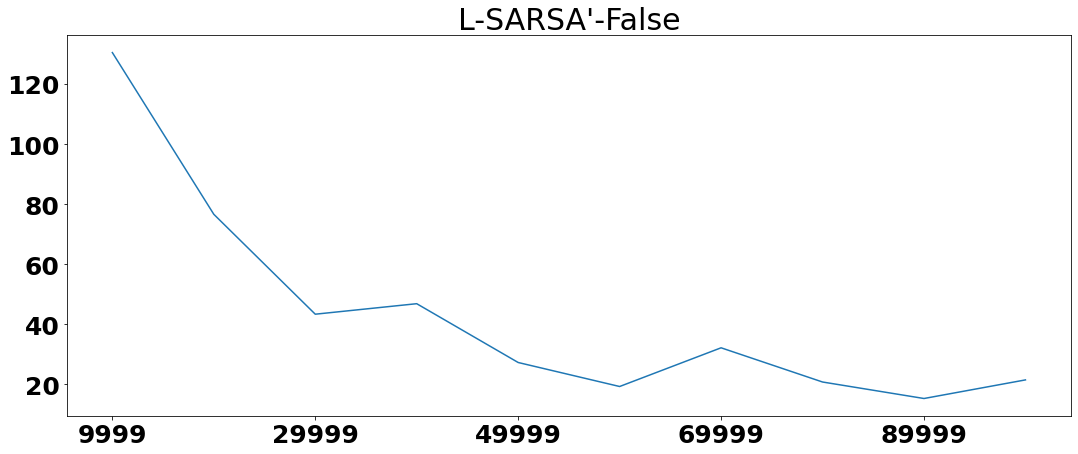

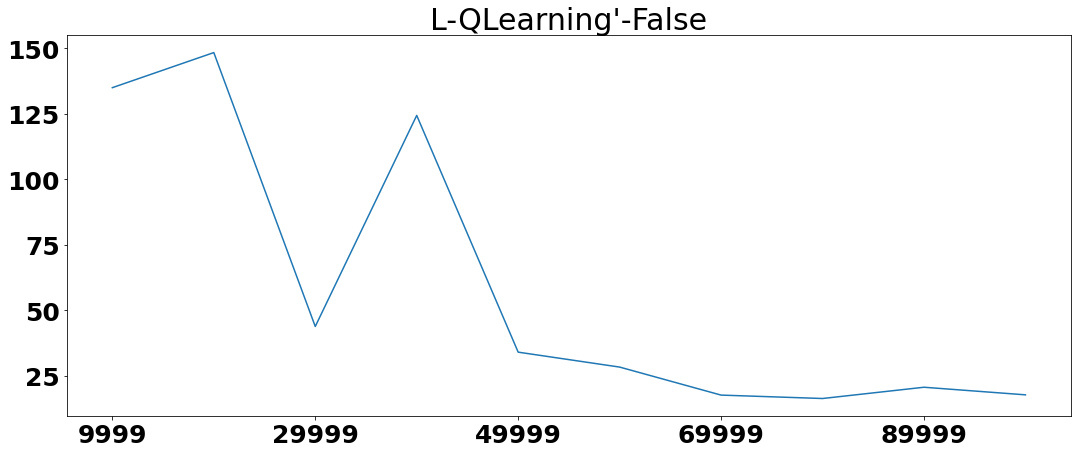

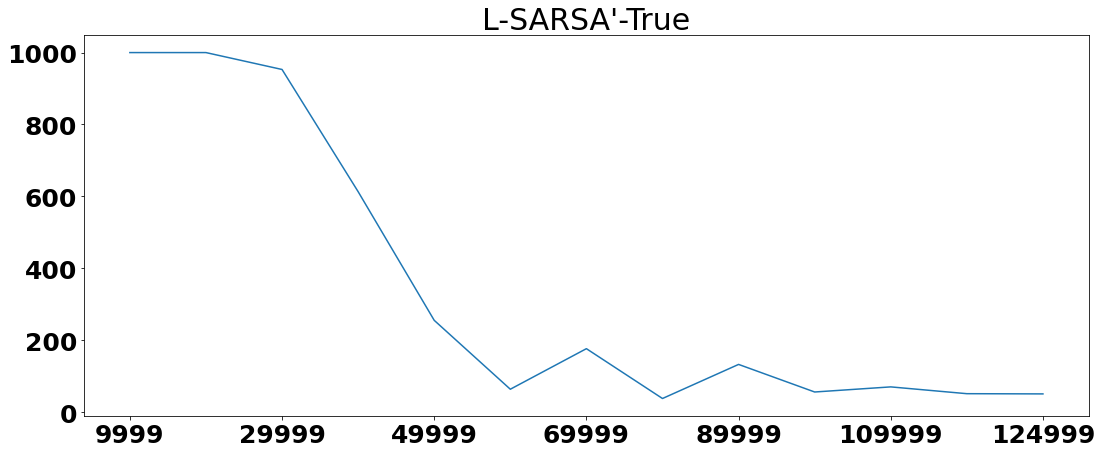

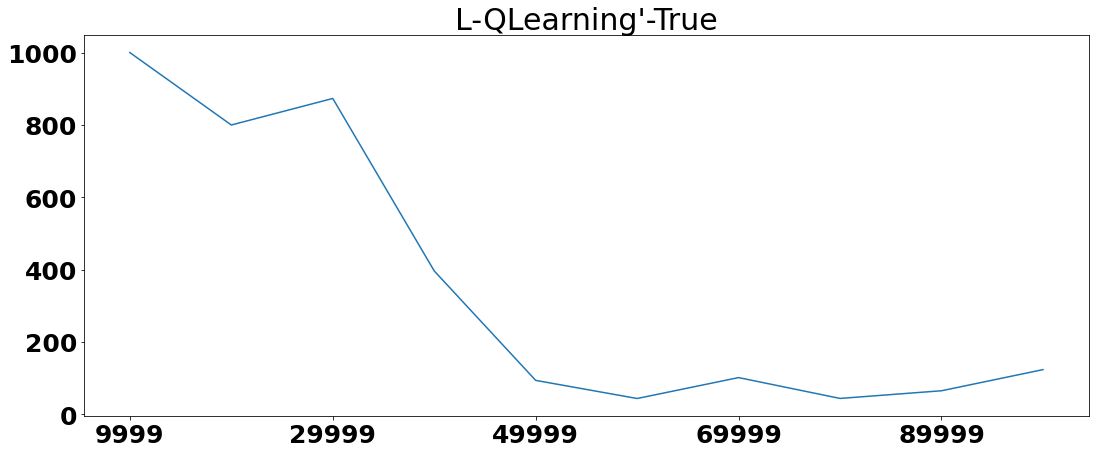

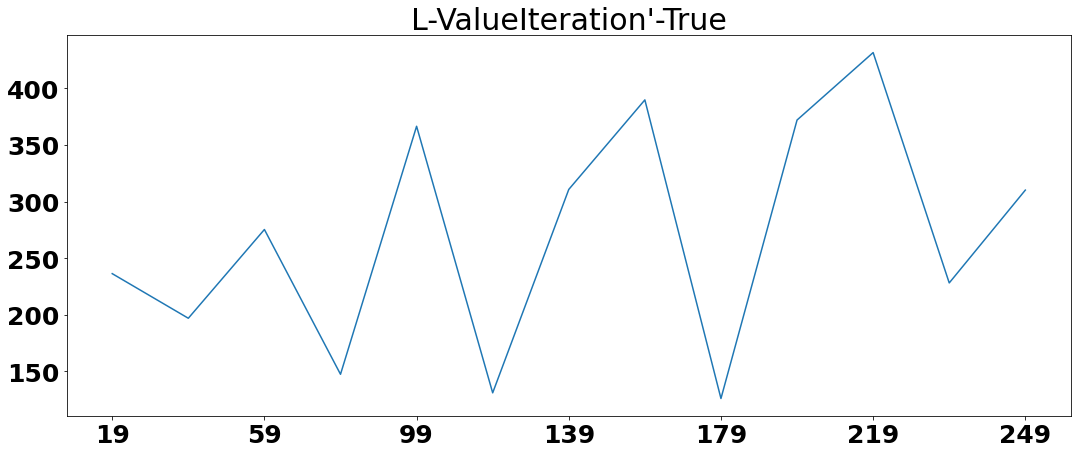

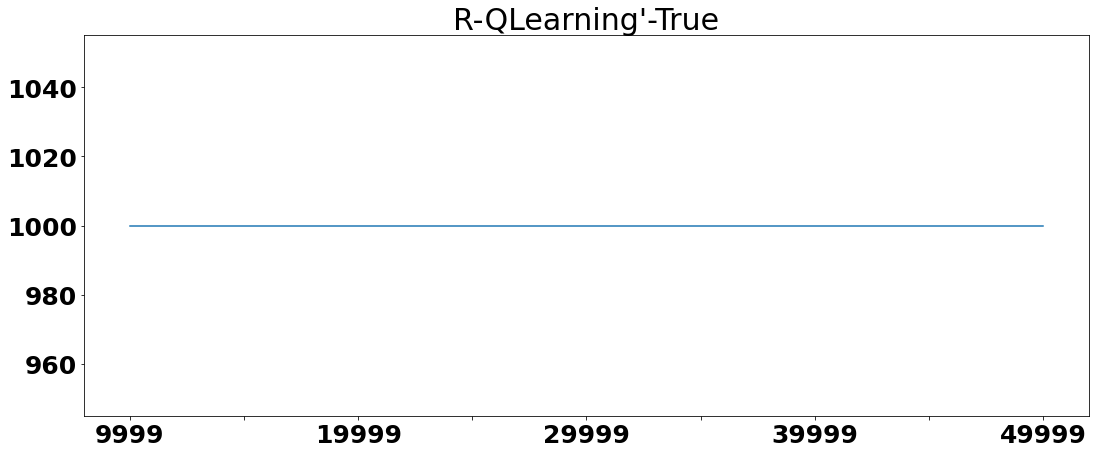

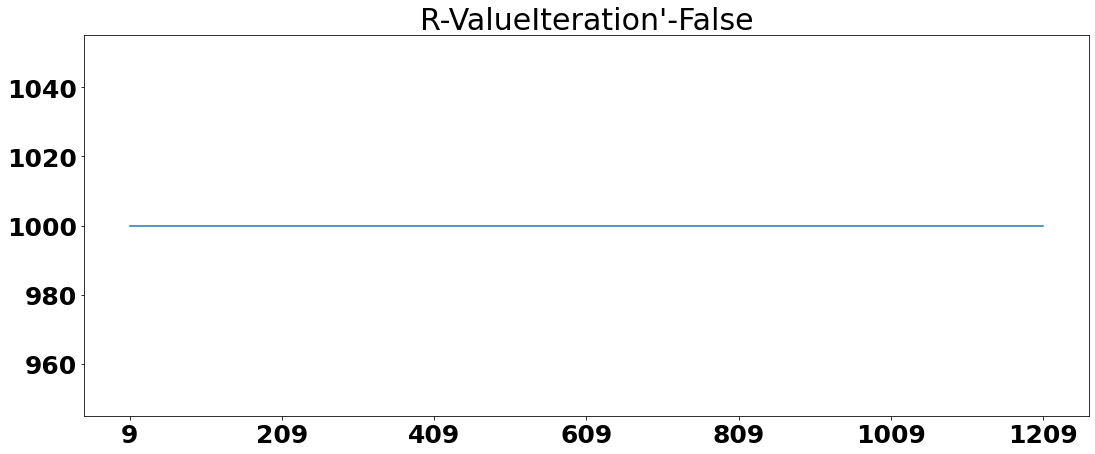

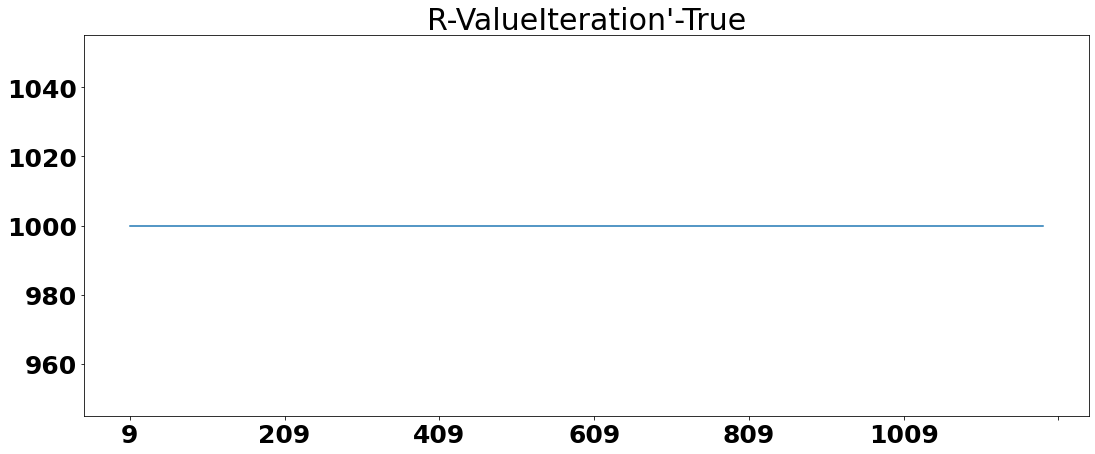

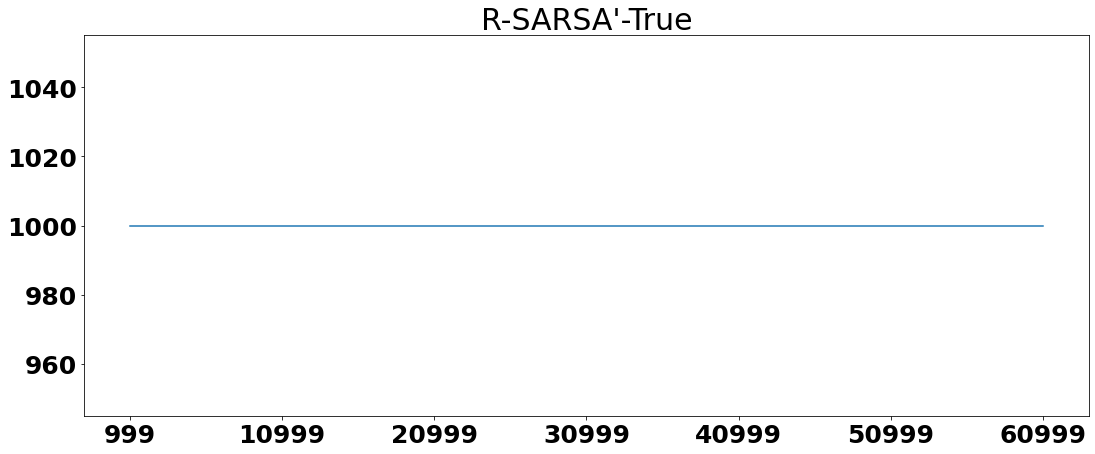

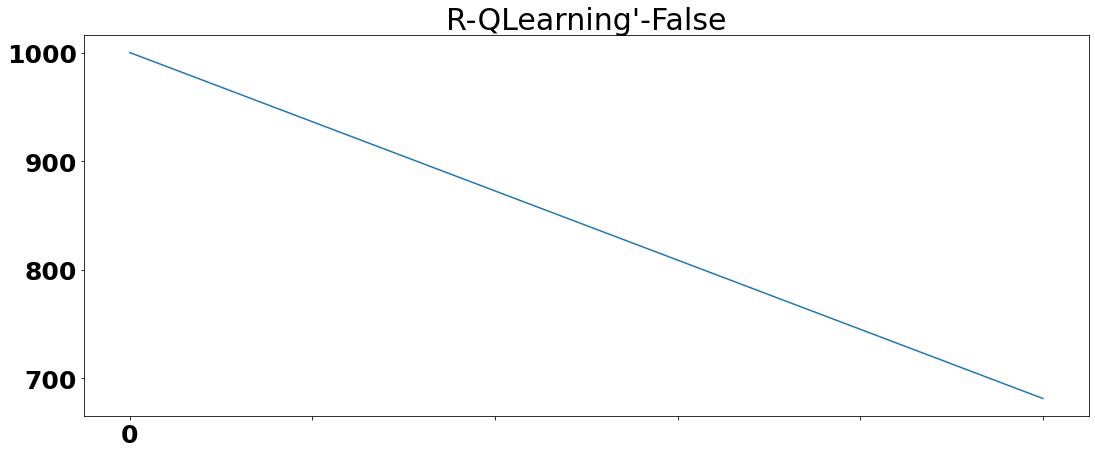

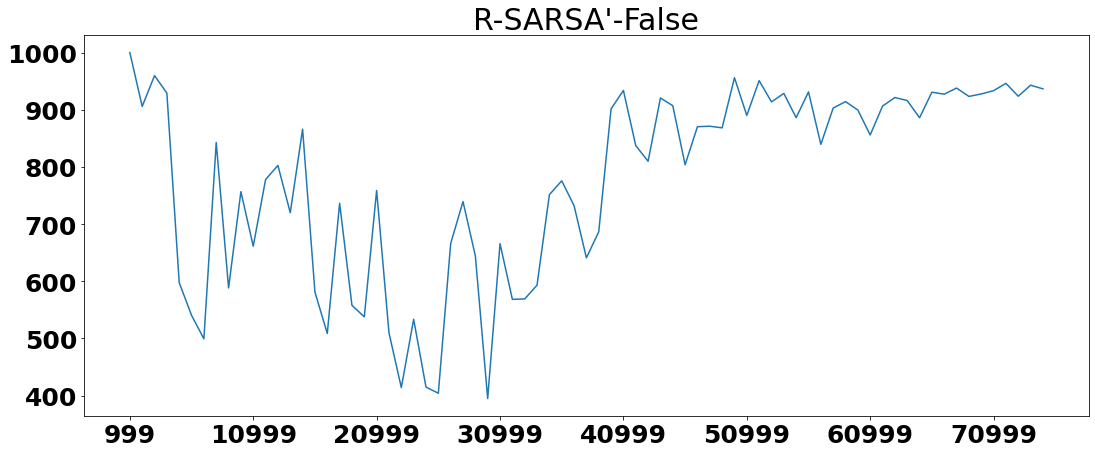

In [46]:
import json, glob
import matplotlib.pyplot as plt

import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

def load_results(path, ty='stats'):    
    return {file: json.load(open(file))[ty] for file in glob.glob(path) if 'pdf' not in file}

def get_algo_name(keyval):
    harsh = keyval.split('_')[-1]
    algo = keyval.split('_')[-2].split(".")[-1][:-1]
    track = keyval.split("/")[-1][0]
    return (track, algo, harsh)

i = 0
for file, results in  load_results('../../O-*').items():
    i +=1
    pd.DataFrame(results).T.mean(axis=1).plot(figsize=(18, 7), title='-'.join(get_algo_name(file)))
    plt.savefig(f"Otrack_{i}_learning_rate.pdf")
    plt.show()
    
    
i = 0
for file, results in  load_results('../../L-*').items():
    i +=1
    pd.DataFrame(results).T.mean(axis=1).plot(figsize=(18, 7), title='-'.join(get_algo_name(file)))
    plt.savefig(f"Ltrack_{i}_learning_rate.pdf")
    plt.show()
    
    
i = 0
for file, results in  load_results('../../R-*').items():
    i +=1
    if "Q" in file and "False" in file:
        (
            pd.DataFrame([1000] * 50)
            .merge(pd.DataFrame((list(res.values())[0])), 
                   left_index=True, 
                   right_index=True).mean()
            .plot(figsize=(18, 7), title='-'.join(get_algo_name(file)))
        )
    else:   
        pd.DataFrame(results).T.mean(axis=1).plot(figsize=(18, 7), title='-'.join(get_algo_name(file)))
    plt.savefig(f"Rtrack_{i}_learning_rate.pdf")
    plt.show()